In [21]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime, date

start = datetime(2016, 1, 1)
end = date.today()

df = web.DataReader("AAPL", 'yahoo', start, end)
df = df.drop(columns=["Adj Close"])
df.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0
2021-05-27,127.639999,125.080002,126.440002,125.279999,94625600.0
2021-05-28,125.800003,124.550003,125.570000,124.610001,71232700.0


In [28]:
from sklearn.model_selection import train_test_split

# W
prices = df[df.columns[0:1]]
prices.reset_index(level=0, inplace=True)
prices["timestamp"] = pd.to_datetime(prices.Date).values.astype(float) // (10**9)
prices = prices.drop(['Date'], axis=1)

prices

<ipython-input-28-0c8ab7005fad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["timestamp"] = pd.to_datetime(prices.Date).values.astype(float) // (10**9)


,High,timestamp
0,26.342501,1.451866e+09
1,26.462500,1.451952e+09
2,25.592501,1.452038e+09
3,25.032499,1.452125e+09
4,24.777500,1.452211e+09
...,...,...
1356,127.940002,1.621814e+09
1357,128.320007,1.621901e+09
1358,127.389999,1.621987e+09
1359,127.639999,1.622074e+09


In [29]:
dataset = prices.values
X = dataset[:,1].reshape(-1,1)
Y = dataset[:,0:1]

validation_size = 0.15
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    #print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.780315 (0.016976)
 LASSO : 0.780315 (0.016976)
 EN : 0.780315 (0.016976)
 KNN : 0.998702 (0.000251)
 CART : 0.998680 (0.000393)
 SVR : 0.964534 (0.006174)


0.19522586435744385


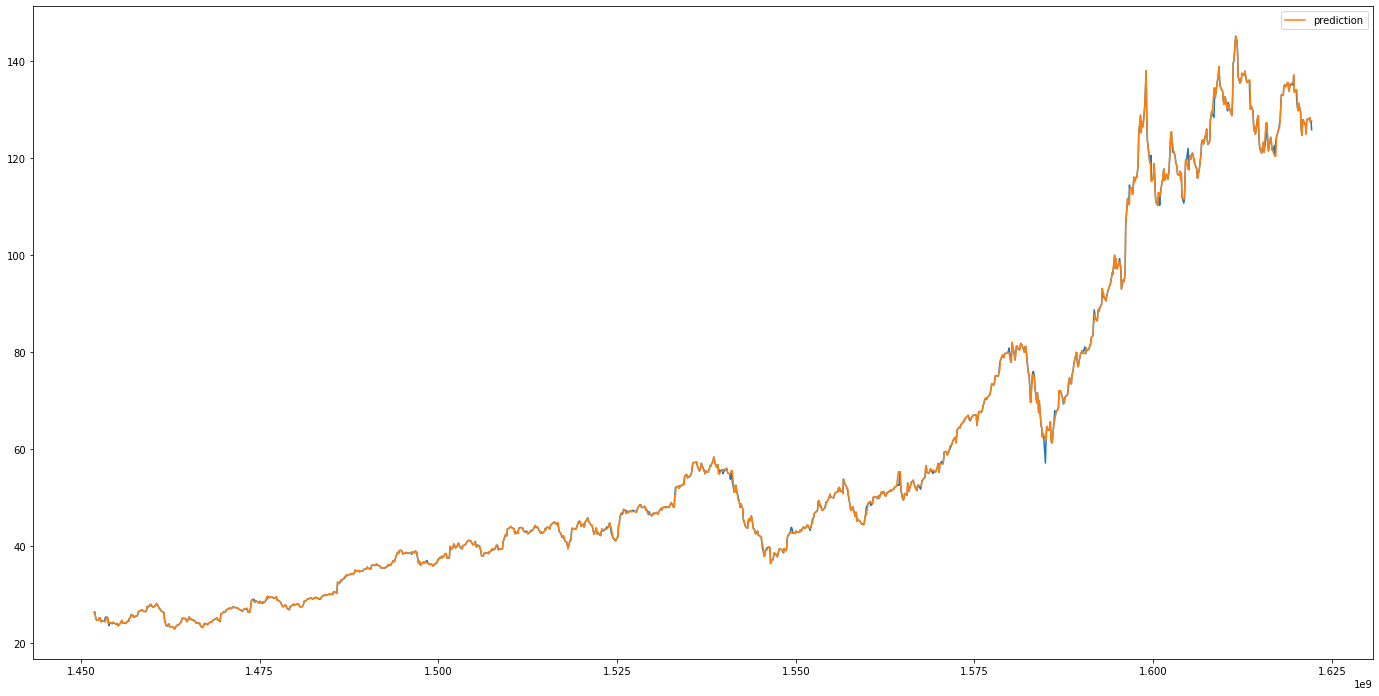

In [40]:
# Future prediction, dates to predict
dates = ["2021-6-1", "2021-6-2", "2021-6-3", "2021-6-4"]
#convert to time stamp
for dt in dates:
    datetime_object = datetime.strptime(dt, "%Y-%m-%d")
    timestamp = datetime.timestamp(datetime_object)
    # to array X
    np.append(X, int(timestamp))

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Define model
model = DecisionTreeRegressor()
# Fit to model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X)
print(mean_squared_error(Y, predictions))

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions,label='prediction')
plt.legend()
plt.show()